## Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import one_hot
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data

In [3]:
unpickle_train = open('/Users/biancaorozco/Desktop/Metis/project5/math/data/outputs/train/train.pickle', 'rb')
train_data = pickle.load(unpickle_train)

In [5]:
unpickle_test = open('/Users/biancaorozco/Desktop/Metis/project5/math/data/outputs/test/test.pickle', 'rb')
test_data = pickle.load(unpickle_test)

### Exploring Data

In [19]:
len(train_data)

261723

In [10]:
test_data[1]

{'features': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
 'label': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int8)}

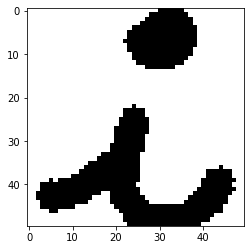

In [11]:
feature1 = test_data[1]['features']
feature1.reshape(50,50)
plt.imshow(feature1.reshape(50,50), cmap = 'gray')

In [12]:
classes = open('classes.txt', 'r').read().split()
one_hot.decode(test_data[1]['label'], classes)

'i'

## Functions

### Scraped Functions

In [ ]:
# def build_df2(data):
#     for i,row in enumerate(data):
#         if i==0:
#             df = pd.DataFrame(row['features']).T
#             y = pd.Series(one_hot.decode(row['label'], classes))
#         else:
#             temp = pd.DataFrame(row['features']).T
#             df = pd.concat([df, temp],ignore_index=True)
#             y = pd.concat([y,pd.Series(one_hot.decode(row['label'], classes))],ignore_index=True)
    
#     return df,y

In [ ]:
#df, y = build_df2(data[:5000])

### Building DF Function

In [13]:
def build_df3(data):
    df = pd.DataFrame()
    y = pd.Series()
    classes = open('classes.txt', 'r').read().split()
    for i,dictionary in enumerate(data): 
        temp = pd.DataFrame(dictionary['features']).T
        df = df.append(temp,ignore_index=True)
        y = y.append(pd.Series(one_hot.decode(dictionary['label'], classes)),ignore_index=True)

    return df,y

## Dictionaries to CSV

In [24]:
df, y = build_df3(train_data[:50000])

In [25]:
df_train = df
df_train['target'] = y
df_train.to_csv('df_train2.csv')

In [ ]:
df2, y2 = build_df3(test_data)

In [ ]:
df_test = df2
df_test['target'] = y2
df_test.to_csv('df_test.csv')